# W2M5 - Sentiment Analysis

---

## 학습 목표
- 레이블링된 텍스트 데이터를 시각화하는 방법을 배운다.
- 작은 데이터셋을 직접 만들어서 전체 과정을 체험해 본다.

## 사전지식
- The dataset has 1.6 million tweets, with no missing values in any column.
- Each tweet has a target sentiment (0 for negative,2 neutral, 4 for positive), an ID, a timestamp, a flag (query or 'NO_QUERY'), the username, and the text.
- The sentiment targets are balanced, with an equal number of positive and negative labels.

## 기능요구사항
- Jupyter notebook에 프로세스 과정을 출력하고 결과 그래프도 출력하세요.
- Positive Sentiment, Negative Sentiment에 각각 해당하는 단어들을 모아서 word cloud를 화면에 표시하세요.
    - Word Cloud를 만들 때 사용할 단어들은 sampling을 통해서 선택하세요.
    - 하나의 word cloud에는 최대 200개의 단어만 표시하세요.

## 프로그래밍 요구사항
- pandas 라이브러리를 사용하세요
- matplotlib 라이브러리를 사용하세요
- wordcloud 라이브러리를 사용하세요
- 2개의 word cloud는 하나의 plot에 그리세요


## 팀 활동견적
- 사용자 데이터셋과 사용자 데이터셋을 웹 스크레이핑을 통해 만든 다음, 워드 클라우드를 만들면 됩니다.
    - 데이터셋을 만들 때 어떤 작업이 필요한가요?
    - 프로토타입에는 최소 1,000개 이상의 데이터를 사용하세요.
- 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있는지에 대해 토의하겠습니다.


---

### 'Kaggle의 데이터셋은 웹 스크래핑보다는 Kaggle API를 사용하여 다운로드하는 것이 권장됨'

### 'Kaggle의 데이터는 일반적으로 로그인 인증이 필요하며, 직접 다운로드하려면 계정을 통해 API 키를 설정해야함'

### 스크래핑 방식으로 접근 시 문제점
- Kaggle은 데이터 파일 직접 스크래핑을 차단하는 보안 설정이 있다.
- 로그인 세션 및 인증 토큰 없이 데이터를 다운로드할 수 없다.
- API를 사용하지 않고 스크래핑을 시도하려면 Selenium 등을 사용해 로그인 프로세스를 자동화해야 하지만, 이는 일반적으로 권장되지 않는다고 한다.

In [29]:
import os
import zipfile
import subprocess

In [30]:
# sentiment140 데이터셋 다운로드
dataset_name = "kazanova/sentiment140"
os.system(f"kaggle datasets download -d {dataset_name}")

# 다운로드 성공 여부를 확인
result = subprocess.run(f"kaggle datasets download -d {dataset_name}", shell=True)
if result.returncode == 0:
    print("다운로드가 성공적으로 완료되었습니다.")
else:
    print("다운로드에 실패했습니다.")

/Users/admin/Documents/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


/Users/admin/Documents/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
다운로드가 성공적으로 완료되었습니다.


In [31]:
# 데이터 압축 해제
zip_file = "sentiment140.zip"
extract_dir = "sentiment140"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [32]:
# 데이터 로드 및 분석
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

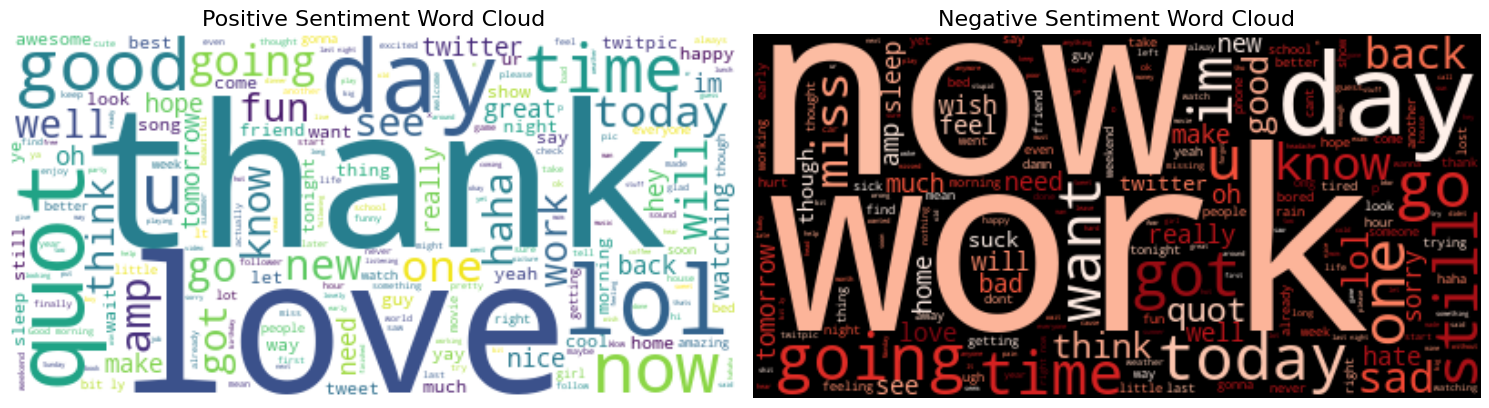

In [33]:
# 데이터 로드 (추출된 CSV 파일의 경로 확인)
data_path = os.path.join(extract_dir, "training.1600000.processed.noemoticon.csv")
data = pd.read_csv(data_path, encoding='latin-1', header=None)  # header=None은 첫 번째 행을 헤더로 사용하지 않음

# 컬럼 이름 지정
data.columns = ['Sentiment', 'ID', 'Date', 'Flag', 'User', 'Text']

# Positive(4)와 Negative(0) 텍스트 필터링
positive_texts = data[data['Sentiment'] == 4]['Text']
negative_texts = data[data['Sentiment'] == 0]['Text']

# 'Word Cloud를 만들 때 사용할 단어는 샘플링을 사용할 수 있도록 선택하세요'
# 는 Word Cloud를 생성할 때 전체 데이터셋에서 일부 데이터를 무작위로 선택하여 사용할 수 있도록 하라는 의미인가?. 
# 일단은 무작위로 생성.

# 단어 합치기 (샘플링 10,000개)
positive_words = " ".join(positive_texts.sample(10000))
negative_words = " ".join(negative_texts.sample(10000))

# Word Cloud 생성
positive_wordcloud = WordCloud(max_words=200, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(max_words=200, background_color="black", colormap="Reds").generate(negative_words)

plt.figure(figsize=(15, 8))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()

--- 

# 팀원과의 공유 및 토의 후 작업사항

- nunique를 사용해서 데이터셋의 형태 및 유형을 먼저 살핀 후, 다시 그려보기
- 전처리 어떻게 할 것인지 고민하기 (ex. Quote)
- 필요없는 column (여기서는 Flag가 해당될 듯?) 을 지워도 될 것인가? 그러면 작업 속도가 올라갈 것인가? 에 대한 고민


### 산야님의 전처리 공유내용

**작업 목록**  
- text 항목 전처리 (데이터 쪼갠 후)
    - 링크형 텍스트 삭제
    - @~~ 삭제
    - 문장부호 삭제 (연속된 마침표 등등) —> You’re 같은게 깨져버리는지 유의 (보통 불용어로 처리되어 있음)
    - &amp &quot &gt &lt —> 삭제
    - 텍스트 이모티콘은 어떻게?? :), ;), ^^, ~_~, 등등
    - 안보이는 이스케이프 문자? (57915 라인에 존재) —> 제로 너비 문자?인 듯
    - 소문자화?

In [34]:
data.nunique()

Sentiment          2
ID           1598315
Date          774363
Flag               1
User          659775
Text         1581466
dtype: int64

In [35]:
data['Sentiment'].unique() # 0: Negative, 4: Positive

array([0, 4])

In [36]:
data['Sentiment'].value_counts()    # 균형있음

Sentiment
0    800000
4    800000
Name: count, dtype: int64

In [39]:
# Flag 컬럼을 삭제할 것인지?

# data = data.drop(columns=['Flag'])
# data

In [43]:
worldcloud_prac = WordCloud(max_words=200, background_color="white").generate(positive_words)
worldcloud_prac.words_

{'thank': 1.0,
 'love': 0.9561815336463224,
 'day': 0.8012519561815337,
 'quot': 0.7574334898278561,
 'lol': 0.7245696400625978,
 'good': 0.7230046948356808,
 'u': 0.701095461658842,
 'now': 0.6885758998435054,
 'time': 0.6165884194053208,
 'today': 0.5821596244131455,
 'one': 0.5790297339593115,
 'going': 0.5774647887323944,
 'will': 0.5539906103286385,
 'amp': 0.5461658841940532,
 'go': 0.5007824726134585,
 'new': 0.48043818466353677,
 'know': 0.458528951486698,
 'haha': 0.4460093896713615,
 'see': 0.4428794992175274,
 'got': 0.4381846635367762,
 'think': 0.41784037558685444,
 'well': 0.41158059467918623,
 'work': 0.40688575899843504,
 'fun': 0.3974960876369327,
 'twitter': 0.38028169014084506,
 'im': 0.37402190923317685,
 'great': 0.37402190923317685,
 'back': 0.36619718309859156,
 'hope': 0.36306729264475746,
 'nice': 0.3442879499217527,
 'really': 0.3286384976525822,
 'make': 0.31768388106416273,
 'tomorrow': 0.3129890453834116,
 'watching': 0.3051643192488263,
 'need': 0.30359937

## quot, lol 이런 것들은 어떻게 처리할 것인가..

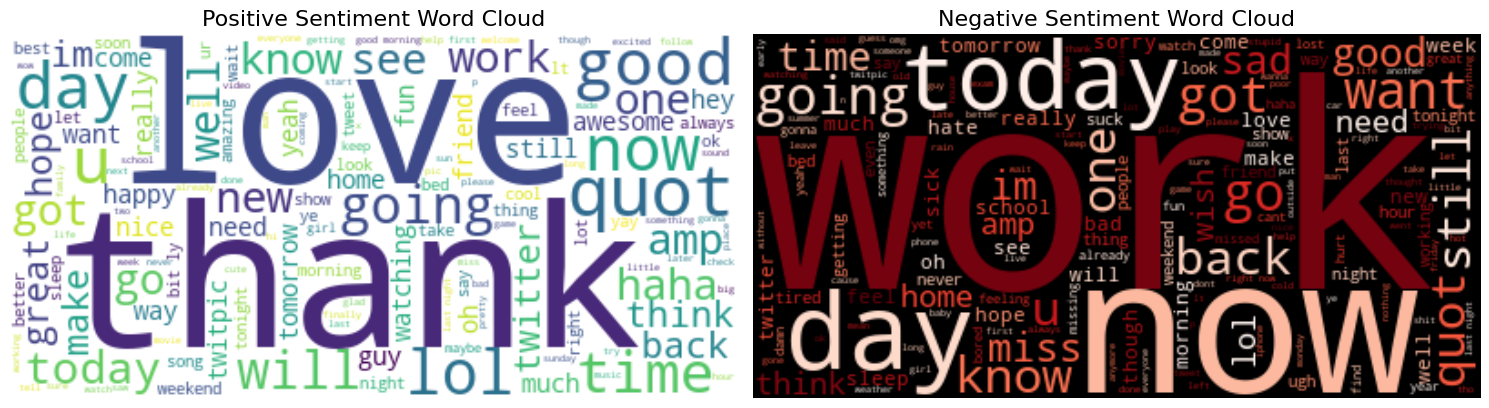

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 데이터 로드 (추출된 CSV 파일의 경로 확인)
data_path = os.path.join(extract_dir, "training.1600000.processed.noemoticon.csv")
data = pd.read_csv(data_path, encoding='latin-1', header=None)

# 컬럼 이름 지정
data.columns = ['Sentiment', 'ID', 'Date', 'Flag', 'User', 'Text']

# Positive(4)와 Negative(0) 텍스트 필터링
positive_texts = data[data['Sentiment'] == 4]['Text']
negative_texts = data[data['Sentiment'] == 0]['Text']

# 불용어 설정
stopwords = set(STOPWORDS)
additional_stopwords = {'quote', 'example'}  # 추가로 제거할 단어들
stopwords.update(additional_stopwords)

# 텍스트 전처리 함수
def preprocess_text(texts):
    return " ".join(texts).lower()  # 단일 문자열로 결합된 텍스트가 필요하므로 join 사용

# 전처리된 텍스트 생성 (샘플링 10,000개)
positive_words = preprocess_text(positive_texts.sample(10000))
negative_words = preprocess_text(negative_texts.sample(10000))

# Word Cloud 생성
positive_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="black", colormap="Reds").generate(negative_words)

# Word Cloud 시각화
plt.figure(figsize=(15, 8))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'lower'